In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = '../csv_detection_info/2, mistanke MCD.csv'
filename_clean = '../csv_detection_info_clean/2, mistanke MCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/2, mistanke MCD'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
209  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
210  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
211  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
212  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
213  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.11559663.212476485...      424      548   
1    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.678...     1183     1407   
2    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.678...     1223     1424   
3    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.678...        0        0   
4    1.2.276.0.82.1.1.1430.1638344853.172.16.123.30...      906     1118   
..                                                 ...      ...      ...   
209  1.3.51.0.7.638191356.18635.51778.44506.15251.1...     1215     1410   
210  1.3.51.0.7.680646380.42121.39246.42055.61591.2...     1206     1436   
211  1.3.51.0.7.681504372.62388.62787.38331.23319.6...      304      457   
212  1.3.51.0.7.790048903.5650.1357.42022.54185.597...      308      462   
213  1.3.51.0.7.859796756.58482.56136.36860.7521.62...      276      409   

     ax1_min  ax1_max  confidence  diagnosis    diagnosis_raw  
0        414      538    0.999857          2  2, mistanke MCD  
1        744      968    0.864653          2  2, mistanke MCD  
2        810     1011    0.867575          2  2, mistanke MCD  
3          0        0    0.000000          2  2, mistanke MCD  
4       1403     1614    0.992371          2  2, mistanke MCD  
..       ...      ...         ...        ...              ...  
209      844     1039    0.996330          2  2, mistanke MCD  
210     1972     2201    0.997858          2  2, mistanke MCD  
211      713      866    0.999996          2  2, mistanke MCD  
212      520      674    0.999998          2  2, mistanke MCD  
213      877     1010    0.999998          2  2, mistanke MCD  

[214 rows x 9 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([3, 23], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

C:\NMBU\TEMP\ipykernel_23948\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_23948\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


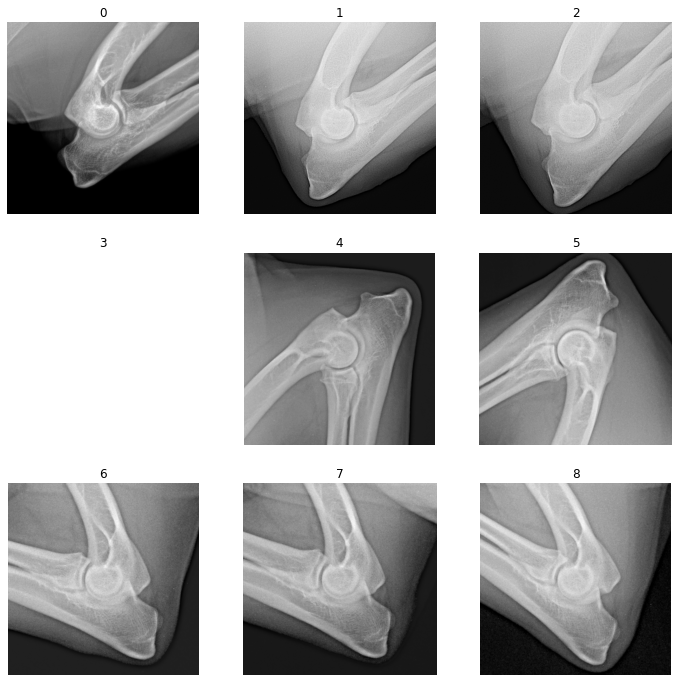

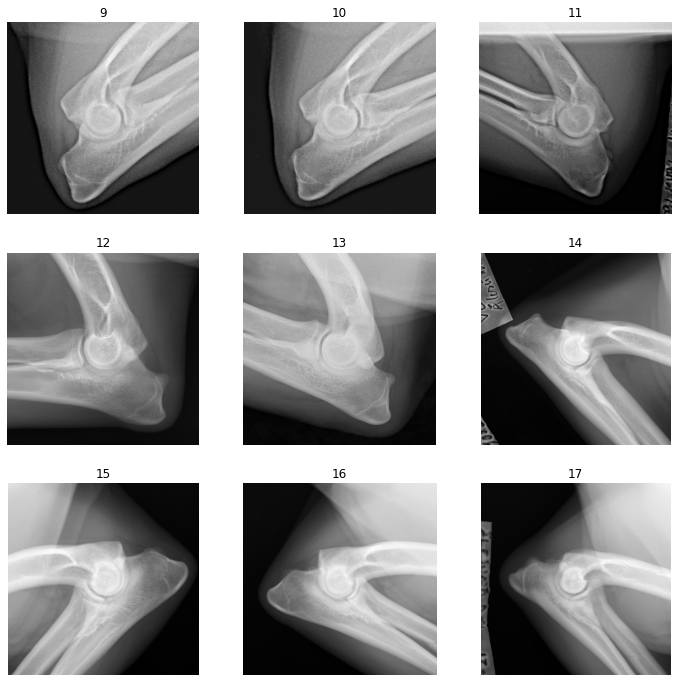

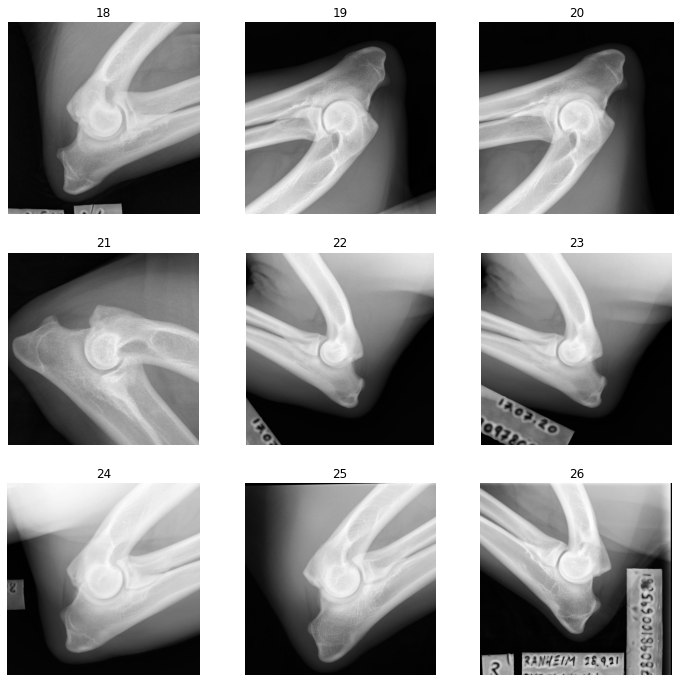

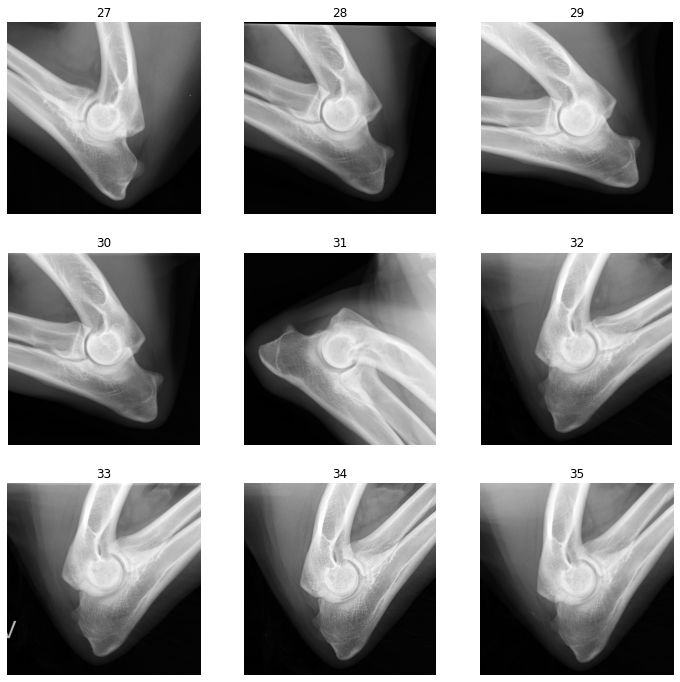

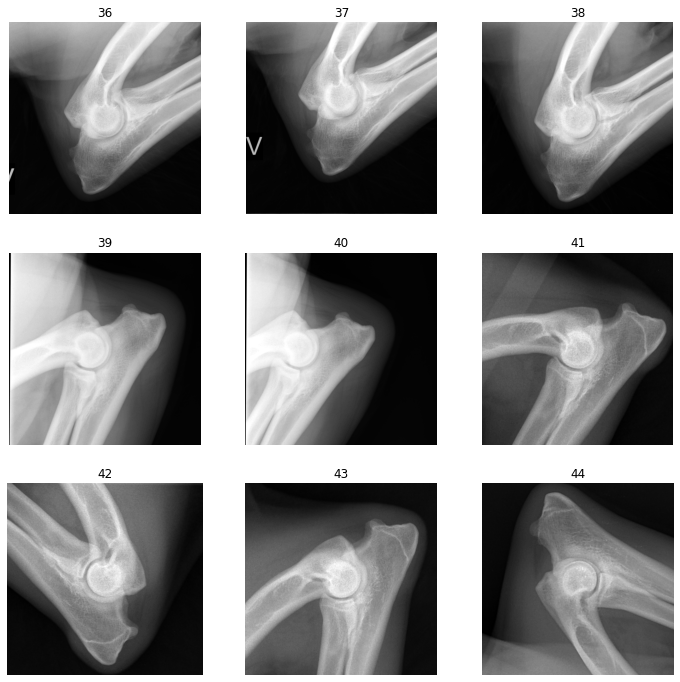

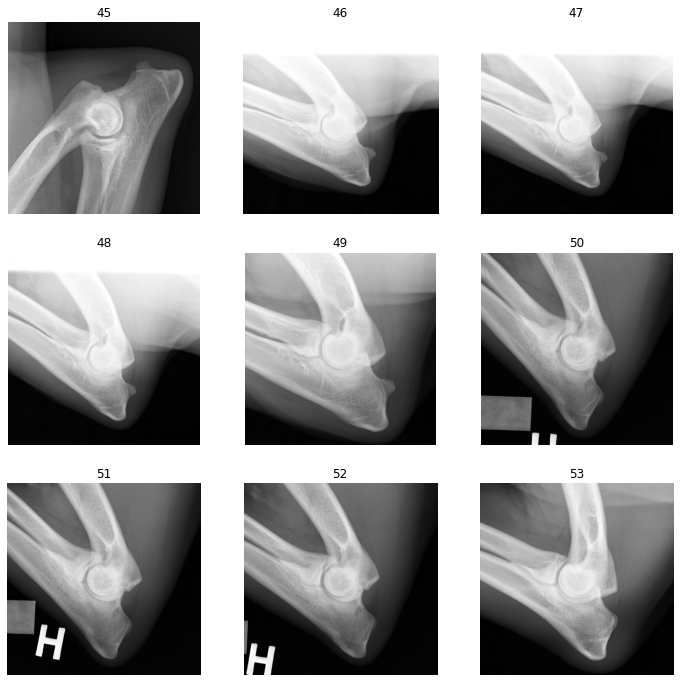

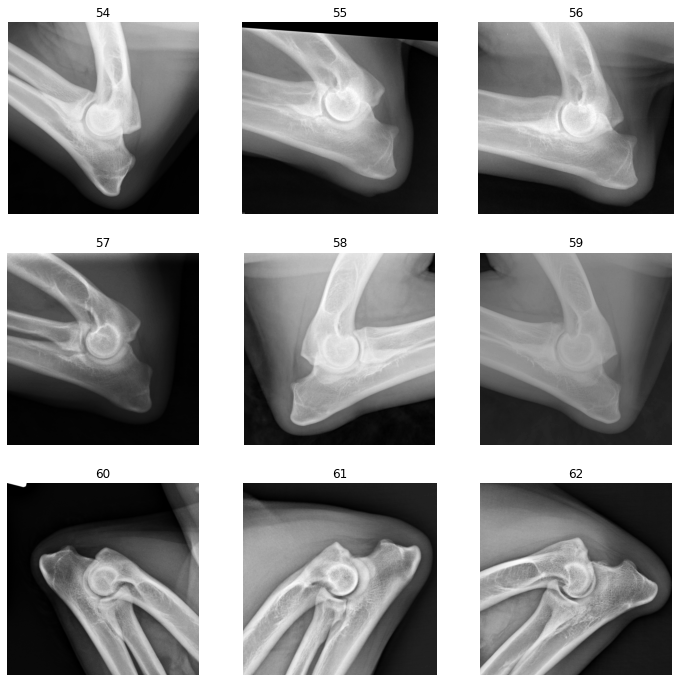

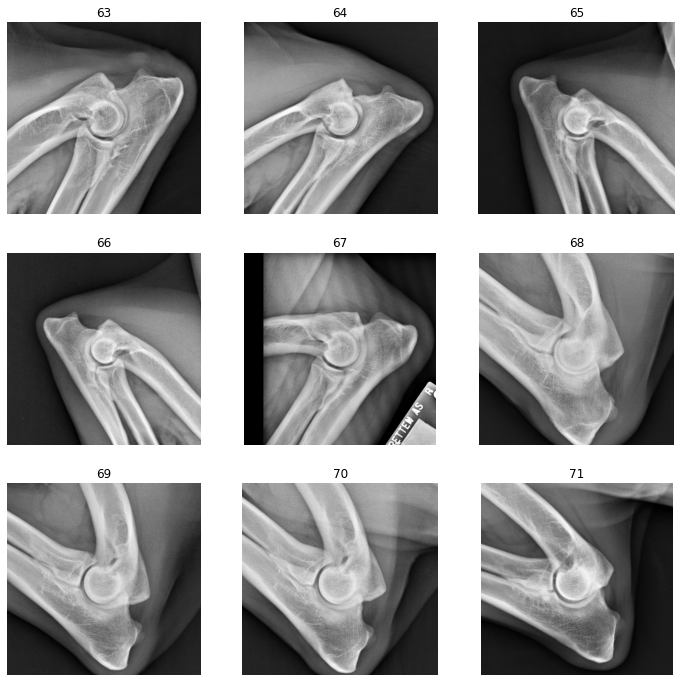

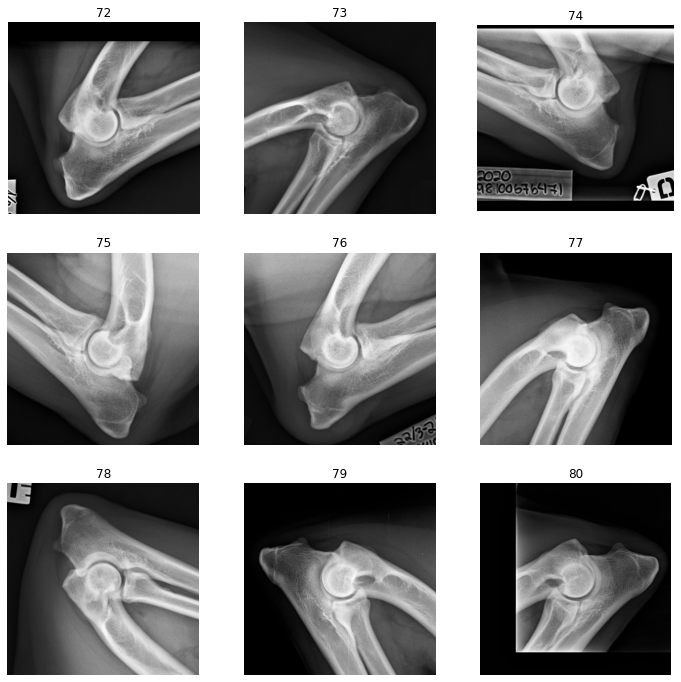

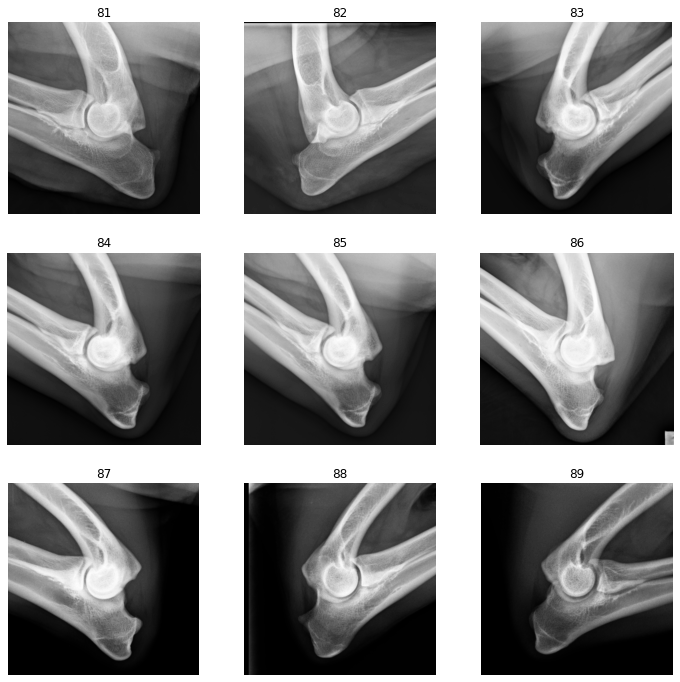

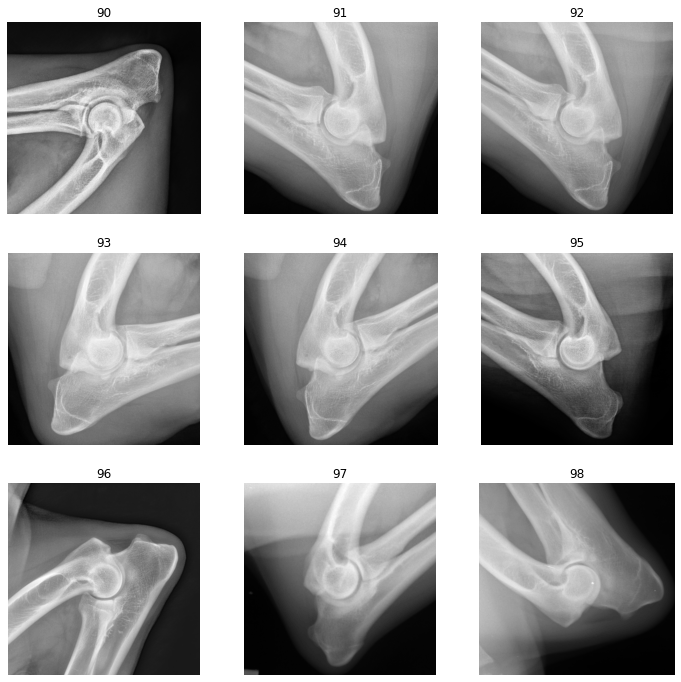

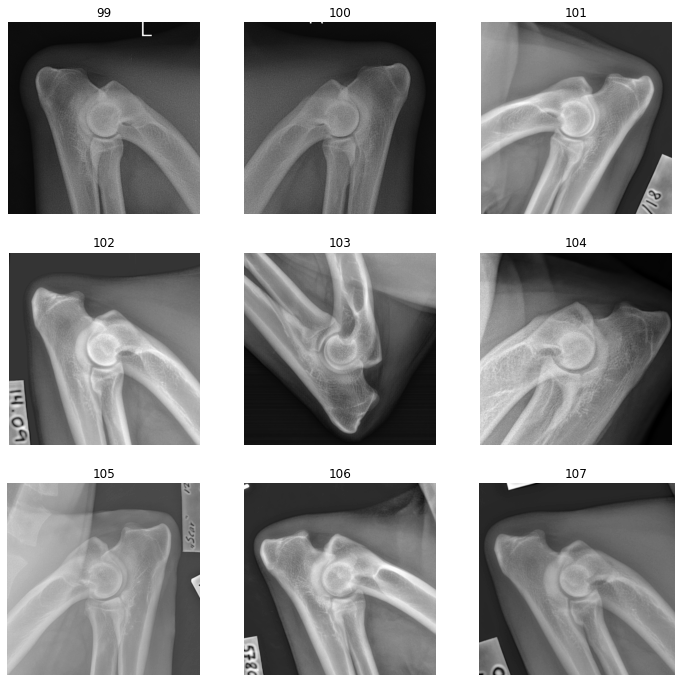

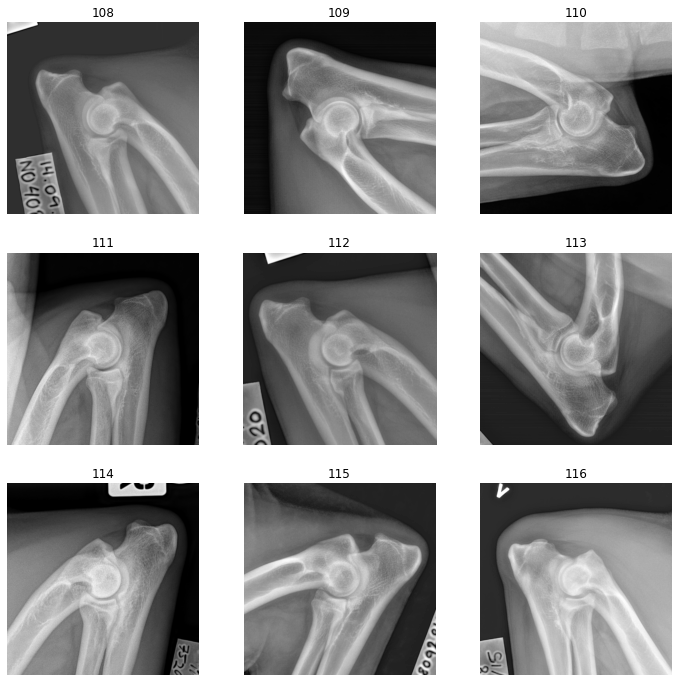

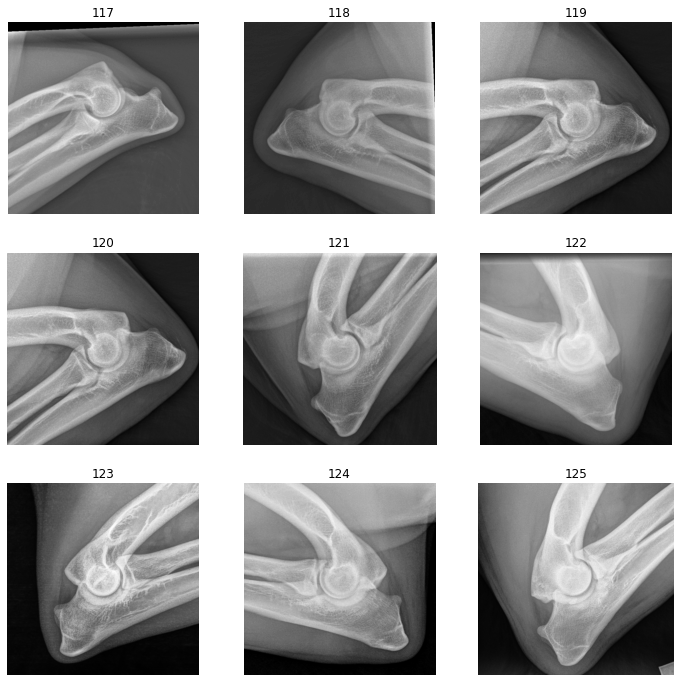

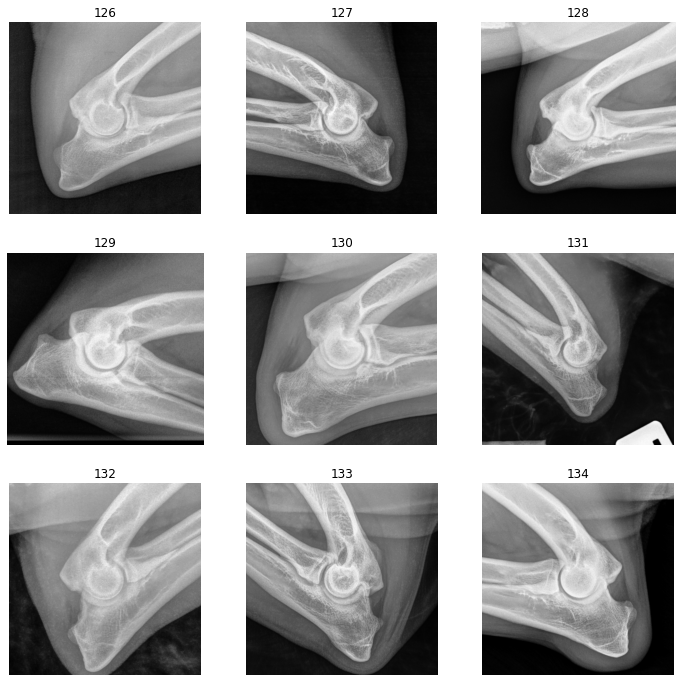

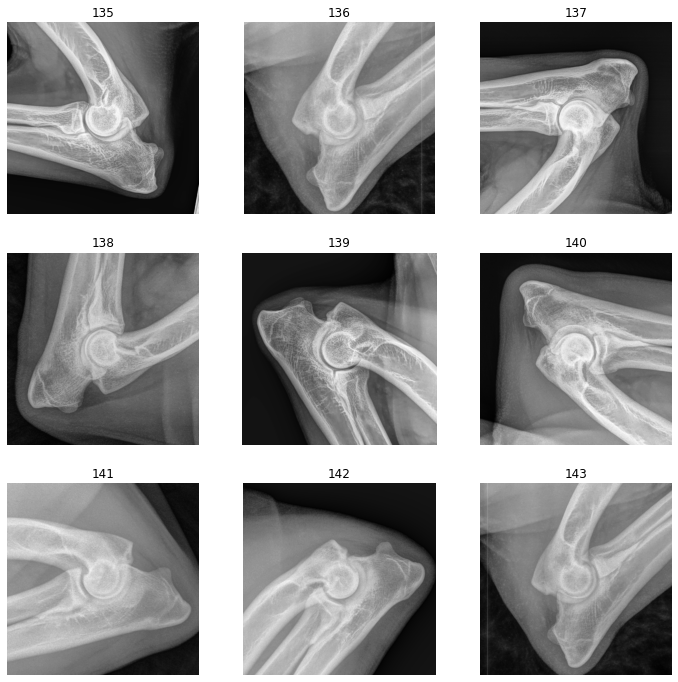

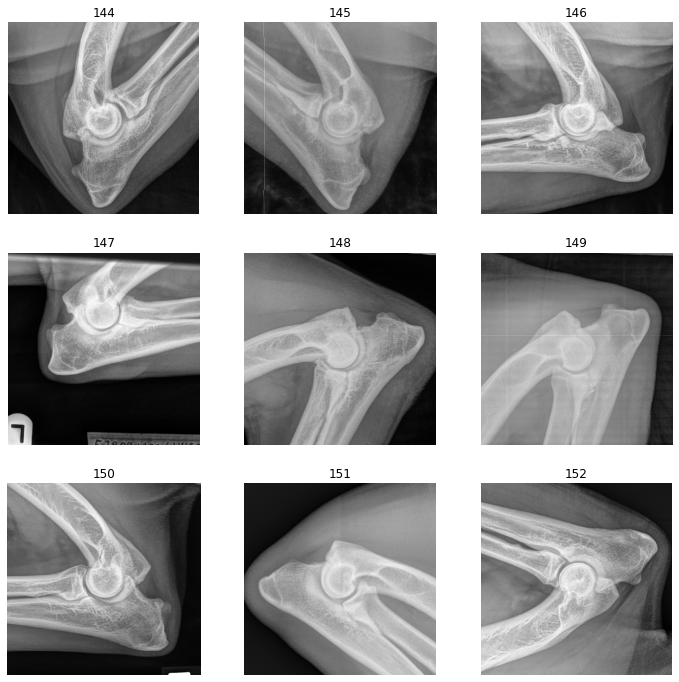

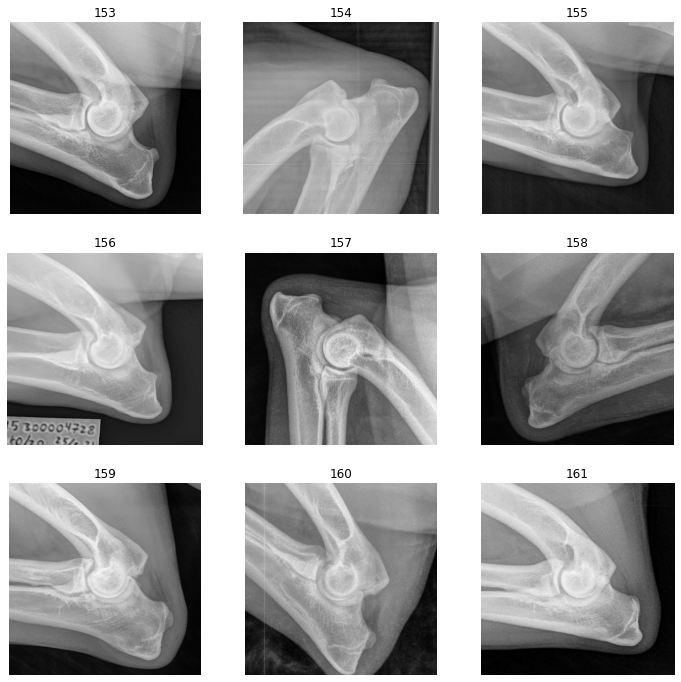

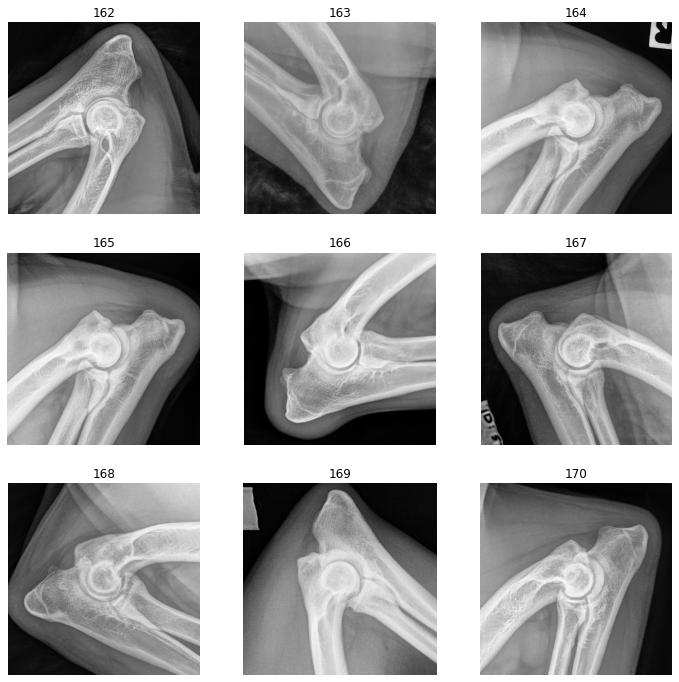

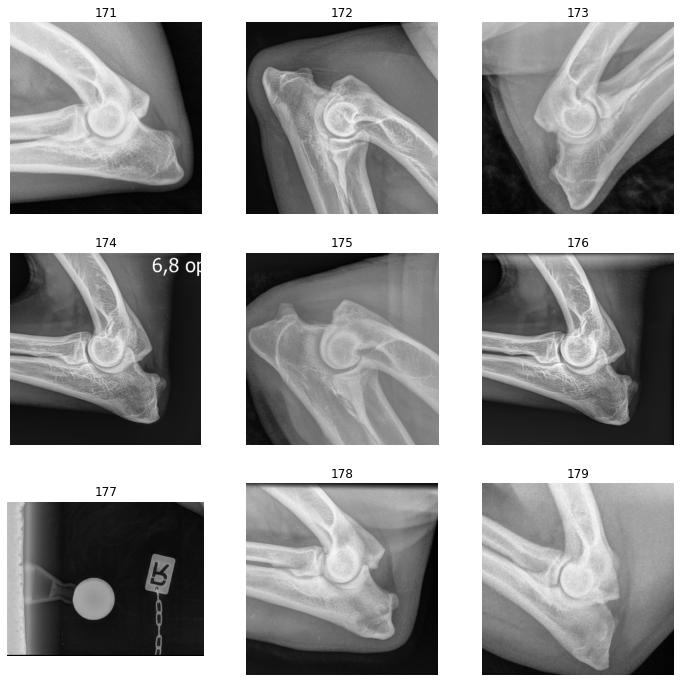

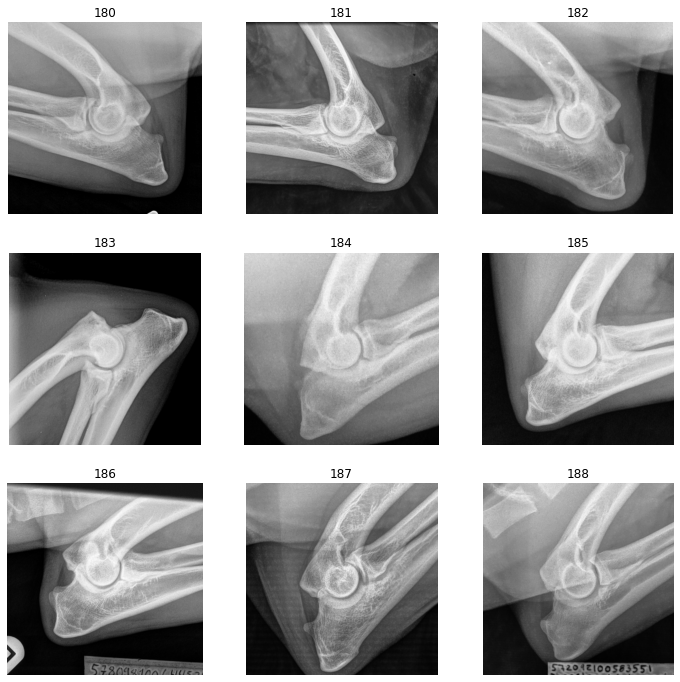

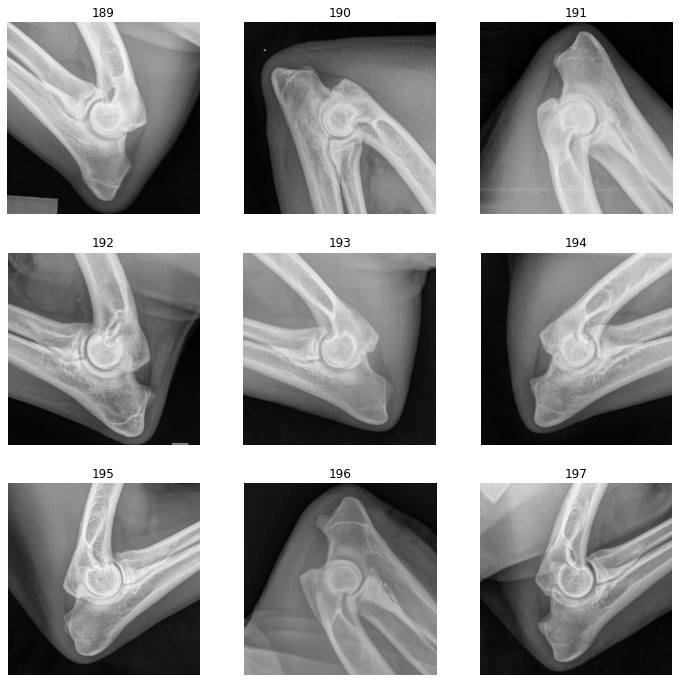

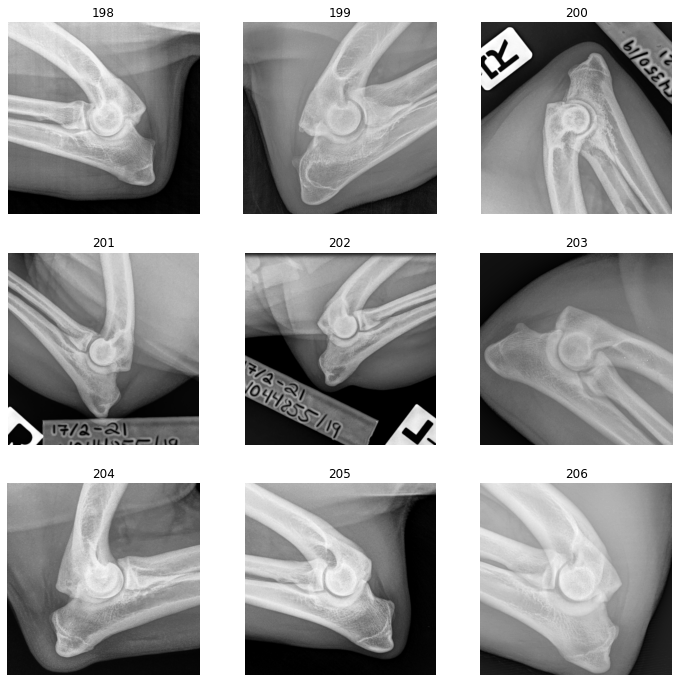

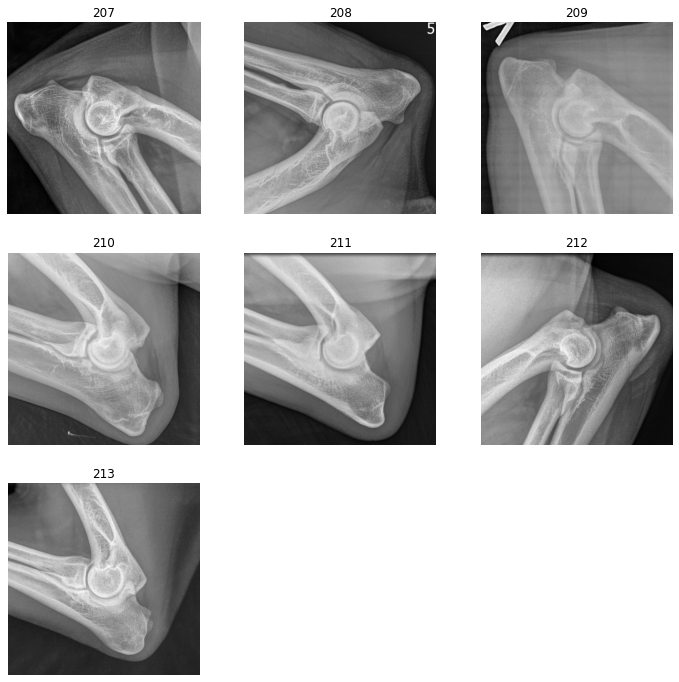

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [3, 177]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
5    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
209  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
210  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
211  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
212  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
213  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.11559663.212476485...      424      548   
1    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.678...     1183     1407   
2    1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.678...     1223     1424   
4    1.2.276.0.82.1.1.1430.1638344853.172.16.123.30...      906     1118   
5    1.2.276.0.82.1.1.1430.1638344853.172.16.123.30...     1107     1309   
..                                                 ...      ...      ...   
209  1.3.51.0.7.638191356.18635.51778.44506.15251.1...     1215     1410   
210  1.3.51.0.7.680646380.42121.39246.42055.61591.2...     1206     1436   
211  1.3.51.0.7.681504372.62388.62787.38331.23319.6...      304      457   
212  1.3.51.0.7.790048903.5650.1357.42022.54185.597...      308      462   
213  1.3.51.0.7.859796756.58482.56136.36860.7521.62...      276      409   

     ax1_min  ax1_max  confidence  diagnosis    diagnosis_raw  
0        414      538    0.999857          1  2, mistanke MCD  
1        744      968    0.864653          1  2, mistanke MCD  
2        810     1011    0.867575          1  2, mistanke MCD  
4       1403     1614    0.992371          1  2, mistanke MCD  
5       1191     1394    0.997562          1  2, mistanke MCD  
..       ...      ...         ...        ...              ...  
209      844     1039    0.996330          1  2, mistanke MCD  
210     1972     2201    0.997858          1  2, mistanke MCD  
211      713      866    0.999996          1  2, mistanke MCD  
212      520      674    0.999998          1  2, mistanke MCD  
213      877     1010    0.999998          1  2, mistanke MCD  

[212 rows x 9 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)